In [1]:
from RL.Environment import EpisodeGenerator, make_variables_simple
from RL.Utils import read_df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.grid'] = True

In [2]:
PATH = "/Users/ifayost/Desktop/TFM/Projects/DATA/SAN_month/best_exec_data/orderbook/"
orderbook = read_df(PATH)

In [3]:
H = pd.to_timedelta(1, unit='hour')
V = 100_000
buy = True
time_step = pd.to_timedelta(0.5, unit='s')
make_variables = make_variables_simple
eg = EpisodeGenerator(H, V, buy, time_step, make_variables)
vardict = make_variables(eg, orderbook.to_dict('list'))

In [4]:
cols = [i for i in vardict.keys() if i not in ['time', 'VORDEN_PRCOMPRA1', 'PRE_COMPRA1', 'PRE_VENTA1', 'VORDEN_PRVENTA1', 'FECHA', 'vol_acc']]
print(cols)

['price', '1800ma', '1800std', '720ma', '240ma', '720rsi', '720mfi', 'p/v', 'spread']


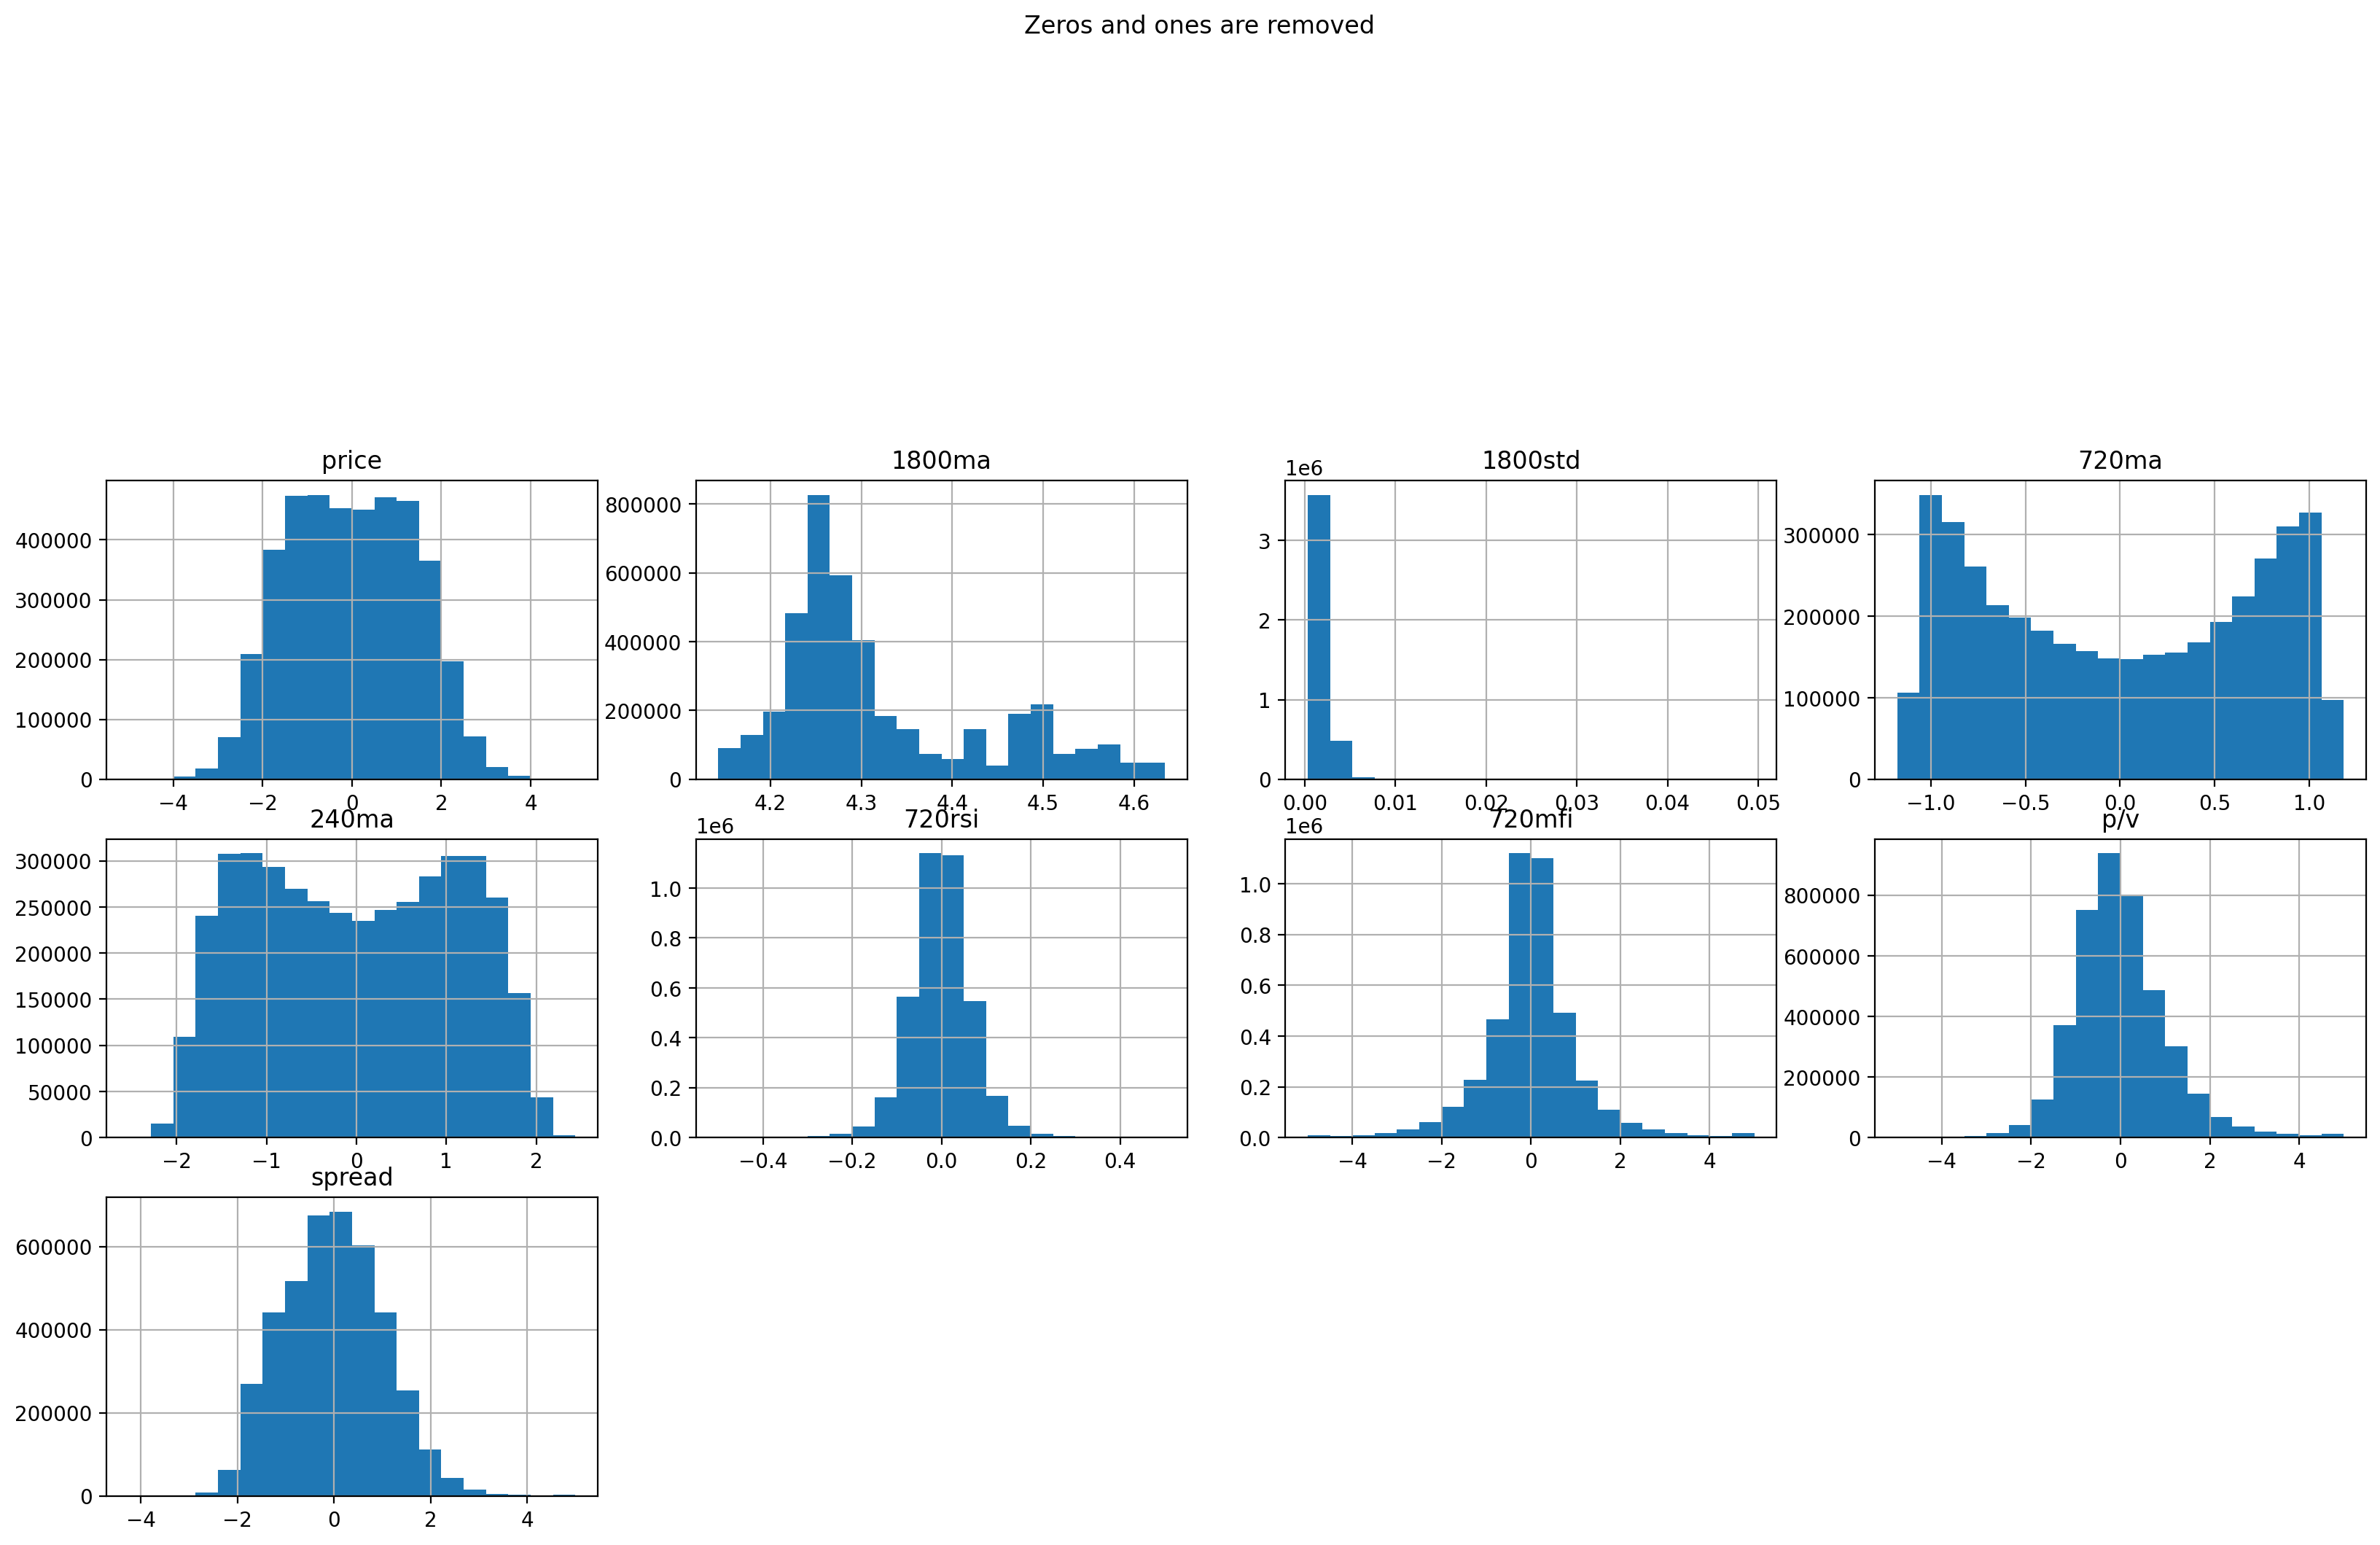

In [6]:
fig = plt.Figure(figsize=(20,32))
for i, col in enumerate(cols):
    x = np.array(vardict[col])
    x = x[x != 0]
    x = x[x != 1]
    ax = fig.add_subplot(10,4,1+i)
    _ = ax.hist(x, bins=20)
    _ = ax.set_title(col)
fig.suptitle('Zeros and ones are removed')
display(fig)